In [ ]:
with open('/content/wrong_capitals_predicted.txt', 'r') as file: #/content/correct_capitals_predicted (1).txt
    sentences = [line.strip() for line in file]

In [ ]:
len(sentences)

113

In [ ]:
# with open('/content/Prompts_sports.txt', 'r') as file:
#     sentences = [line.strip() for line in file]
# len(sentences)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import entropy

In [ ]:
from os import path
path1 = '/df_causal_trace_capitals_subject_corruption.csv'#'/content/df_causal_trace_capitals_subject_corruption.csv'
path2 = '/df_causal_tracing_capitals_relations_corruption.csv'#'/content/df_causal_tracing_capitals_relations_corruption.csv'
path3 = '/df_causal_capitals_all_tokens_corruption.csv'#'/content/df_causal_capitals_all_tokens_corruption.csv'
path4 = '/content/df_causal_trace_wrongcapitals_subject.csv'#'/content/df_causal_trace_sports_subject.csv'
path5 = '/content/df_causal_trace_wrongcapitals_relation.csv'#'/content/df_causal_trace_sports_relation_corrupt.csv'
path6 = '/content/df_causal_trace_wrongcapitals_all.csv'#'/content/df_causal_trace_sports_all_tokens.csv'
path7 = '/df_causal_trace_sports_subject.csv'
path8 = '/df_causal_trace_sports_relation_corrupt.csv'
path9 = '/df_causal_trace_sports_all_tokens.csv'



df1 = pd.read_csv(path1)
df1 = df1.drop('Unnamed: 0', axis=1)
df2 = pd.read_csv(path2)
df2 = df2.drop('Unnamed: 0', axis=1)
df3 = pd.read_csv(path3)
df3 = df3.drop('Unnamed: 0', axis=1)
df4 = pd.read_csv(path4)
df4 = df4.drop('Unnamed: 0', axis=1)
df5 = pd.read_csv(path5)
df5 = df5.drop('Unnamed: 0', axis=1)
df6 = pd.read_csv(path6)
df6 = df6.drop('Unnamed: 0', axis=1)
df7 = pd.read_csv(path7)
df7 = df7.drop('Unnamed: 0', axis=1)
df8 = pd.read_csv(path8)
df8 = df8.drop('Unnamed: 0', axis=1)
df9 = pd.read_csv(path9)
df9 = df9.drop('Unnamed: 0', axis=1)

In [ ]:
popular_df_subject = df7.iloc[:len(df7)//2, :]
rare_df_subject = df7.iloc[len(df7)//2:, :]

popular_df_relation = df8.iloc[:len(df7)//2, :]
rare_df_relation = df8.iloc[len(df7)//2:, :]

popular_df_all = df9.iloc[:len(df7)//2, :]
rare_df_all = df9.iloc[len(df7)//2:, :]

In [ ]:
len(df4), len(df5), len(df6), len(df7)

(113, 113, 113, 174)

In [ ]:
import seaborn as sns

In [ ]:
def plot_peak(df, title):

    peak = df.apply(lambda row: row.idxmax(), axis=1)
    peak = peak.astype(int)

    sns.set(style="whitegrid")
    plt.rcParams['xtick.labelsize'] = 24
    plt.rcParams['ytick.labelsize'] = 24
    sns.histplot(peak, bins=np.arange(48), kde=False, stat="density", alpha=0.75, edgecolor='black', color = '#0f52ba')

    # Customize the appearance
    plt.title(title, fontsize = 40)
    plt.xlabel("Layer number", fontsize = 14)
    plt.ylabel("Normalized frequency", fontsize = 14)
    plt.ylim(0, 0.55)
    plt.xticks(np.arange(0,47,5))

    # Show the plot
    plt.show()


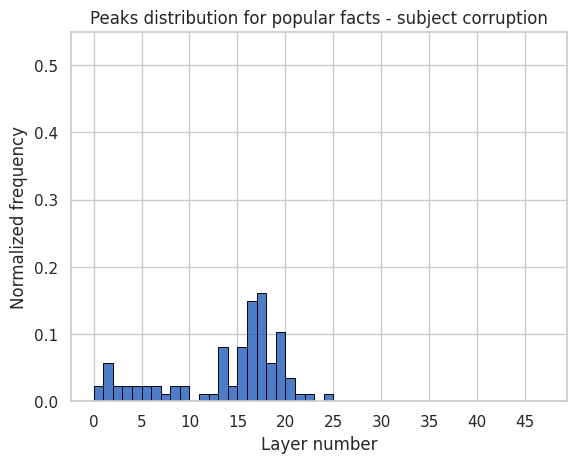

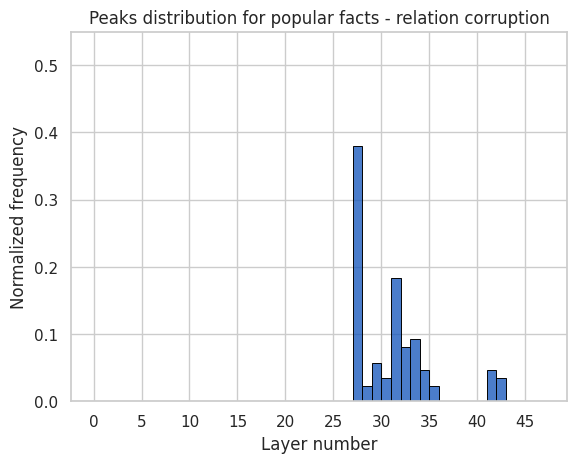

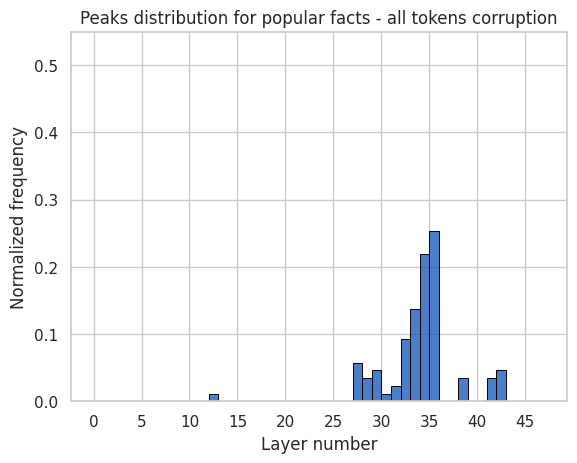

In [ ]:
plot_peak(popular_df_subject, 'Peaks distribution for popular facts - subject corruption')
plot_peak(popular_df_relation, 'Peaks distribution for popular facts - relation corruption')
plot_peak(popular_df_all, 'Peaks distribution for popular facts - all tokens corruption')

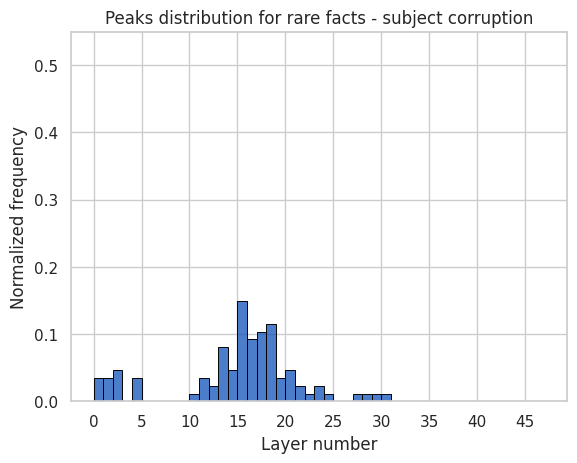

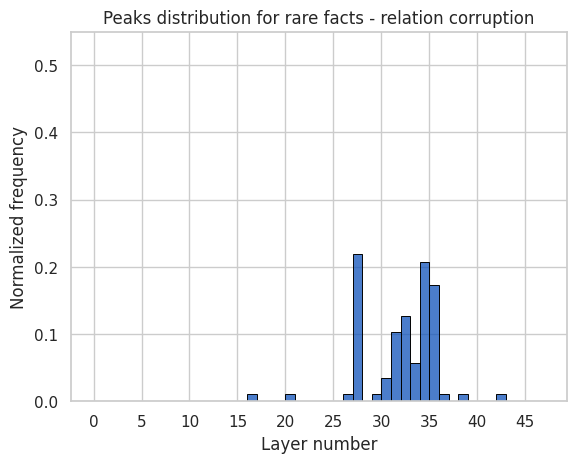

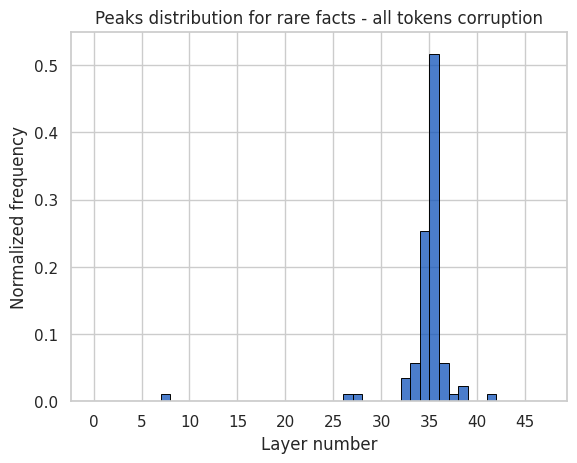

In [ ]:
plot_peak(rare_df_subject, 'Peaks distribution for rare facts - subject corruption')
plot_peak(rare_df_relation, 'Peaks distribution for rare facts - relation corruption')
plot_peak(rare_df_all, 'Peaks distribution for rare facts - all tokens corruption')

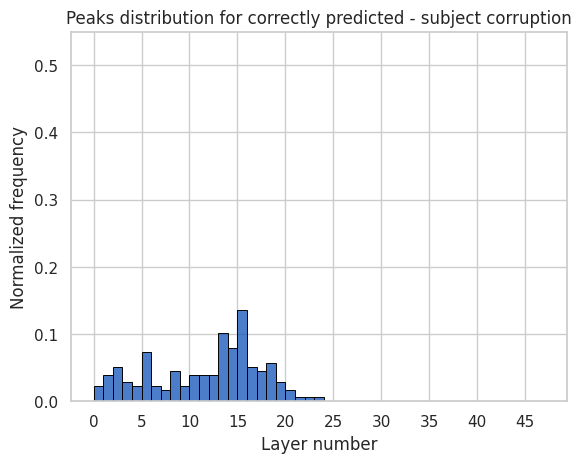

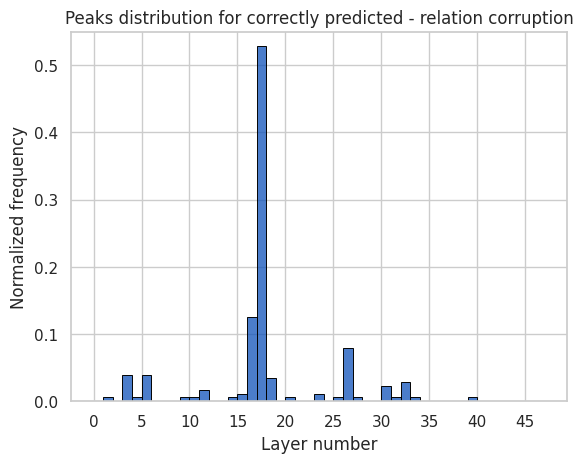

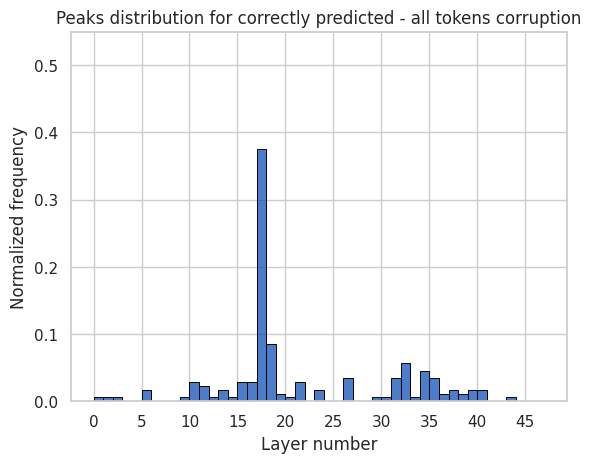

In [ ]:
plot_peak(df1, 'Peaks distribution for correctly predicted - subject corruption')
plot_peak(df2, 'Peaks distribution for correctly predicted - relation corruption')
plot_peak(df3, 'Peaks distribution for correctly predicted - all tokens corruption')

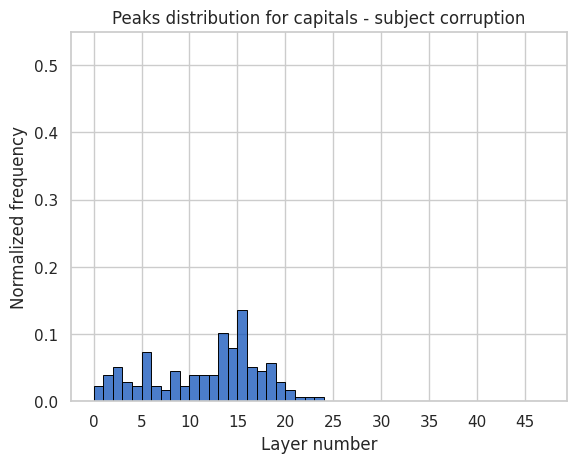

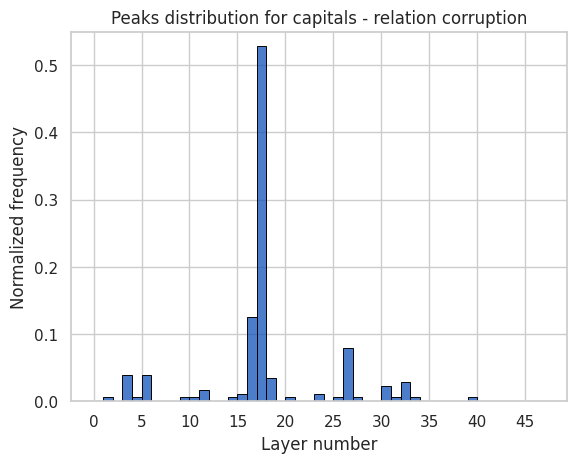

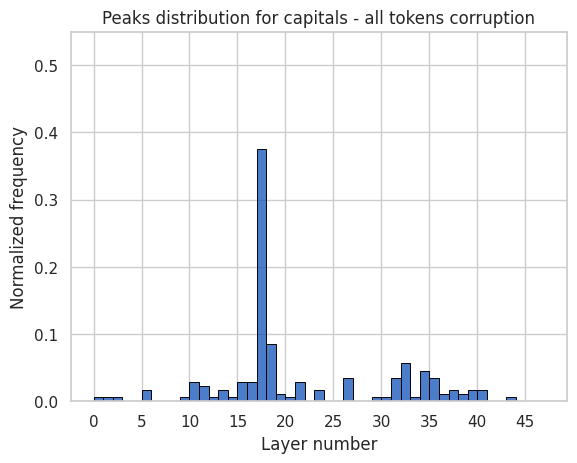

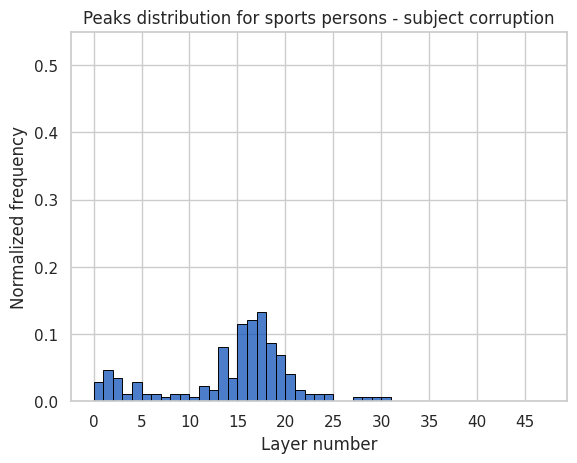

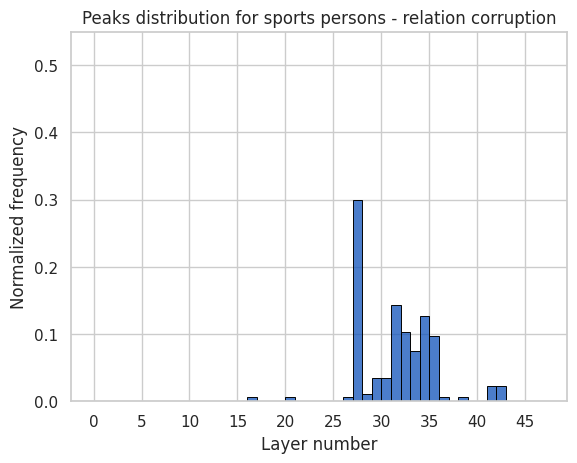

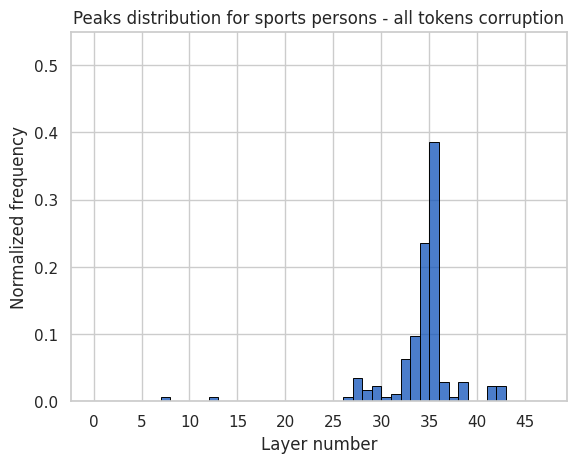

In [ ]:
plot_peak(df1, 'Peaks distribution for capitals - subject corruption')
plot_peak(df2, 'Peaks distribution for capitals - relation corruption')
plot_peak(df3, 'Peaks distribution for capitals - all tokens corruption')
plot_peak(df7, 'Peaks distribution for sports persons - subject corruption')
plot_peak(df8, 'Peaks distribution for sports persons - relation corruption')
plot_peak(df9, 'Peaks distribution for sports persons - all tokens corruption')

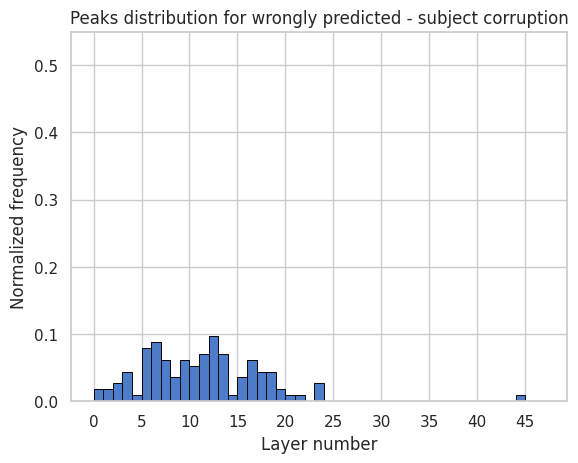

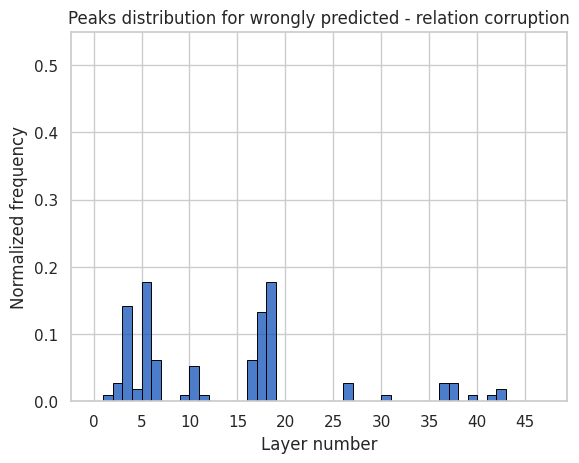

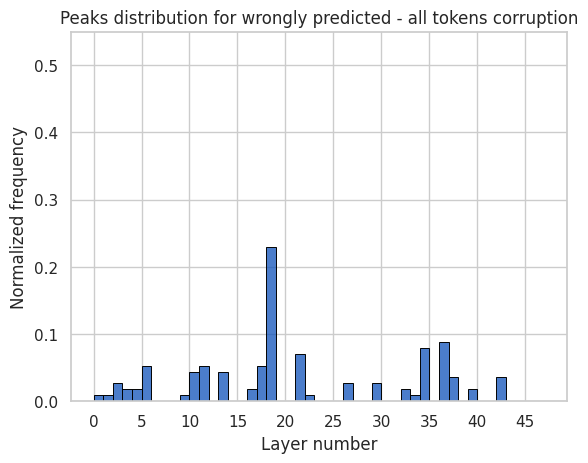

In [ ]:
plot_peak(df4, 'Peaks distribution for wrongly predicted - subject corruption')
plot_peak(df5, 'Peaks distribution for wrongly predicted - relation corruption')
plot_peak(df6, 'Peaks distribution for wrongly predicted - all tokens corruption')

In [ ]:
def avg_plot(df, title):
  average_values = df.mean(axis=0)
  sns.set(style="whitegrid")
  sns.barplot(x=average_values.index, y=average_values.values, color = "#0f52ba", edgecolor='black', alpha = 0.85, width = 0.65)
  plt.xticks(np.arange(0,48,5))
  plt.ylim(0,0.5)
  plt.title(title) #('Avg distribution for wrongly predicted capitals - subject corruption')
  plt.xlabel('Layer number')
  plt.ylabel('Mean probability')
  plt.show()

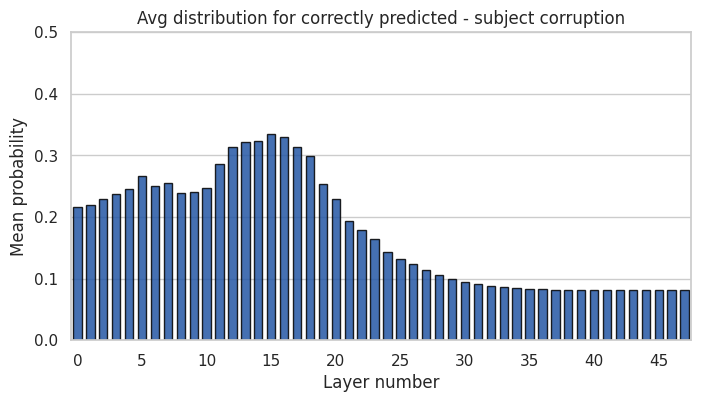

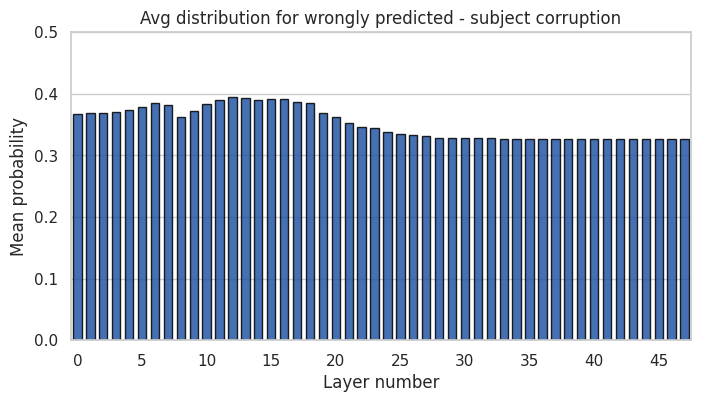

In [ ]:
plt.figure(figsize = (8,4))
avg_plot(df1,'Avg distribution for correctly predicted - subject corruption')
plt.figure(figsize = (8,4))
avg_plot(df4,'Avg distribution for wrongly predicted - subject corruption')

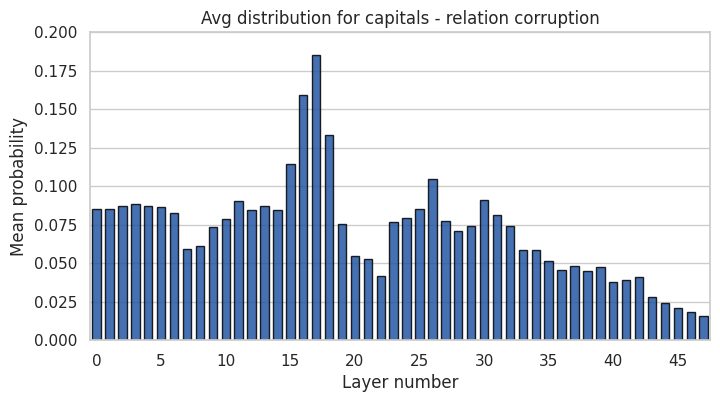

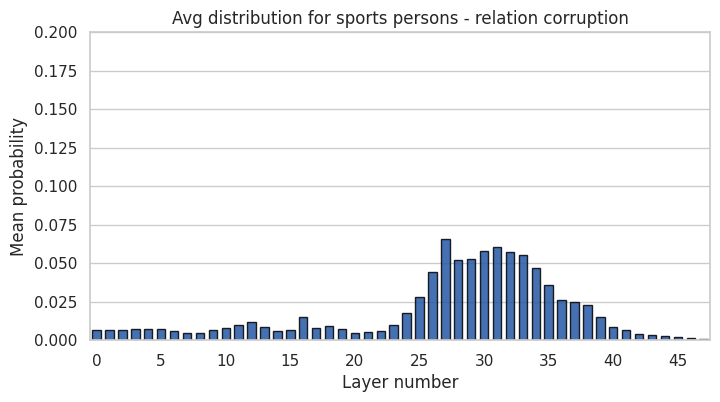

In [ ]:
plt.figure(figsize = (8,4))
avg_plot(df2,'Avg distribution for capitals - relation corruption')
plt.figure(figsize = (8,4))
avg_plot(df8,'Avg distribution for sports persons - relation corruption')

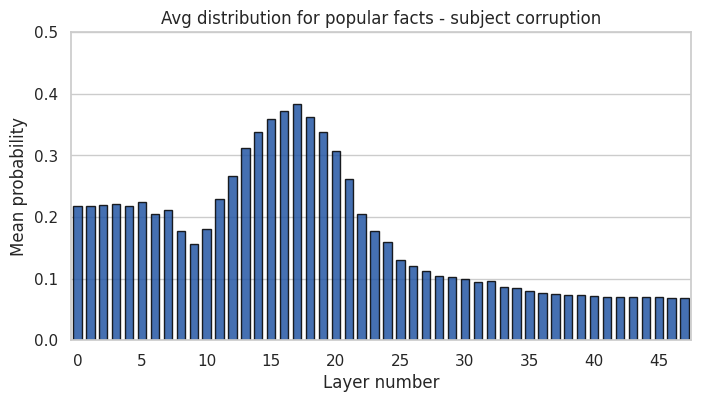

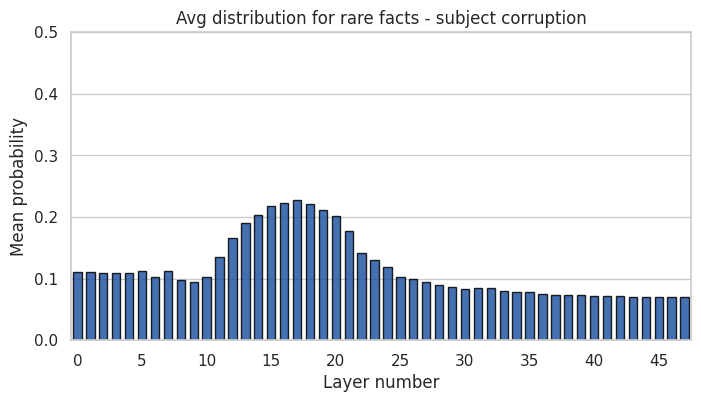

In [ ]:
plt.figure(figsize = (8,4))
avg_plot(popular_df_subject,'Avg distribution for popular facts - subject corruption')
plt.figure(figsize = (8,4))
avg_plot(rare_df_subject,'Avg distribution for rare facts - subject corruption')

In [ ]:
plt.figure(figsize = (8,4))
avg_plot(popular_df_subject,'Avg distribution for popular facts - subject corruption')
plt.figure(figsize = (8,4))
avg_plot(rare_df_subject,'Avg distribution for rare facts - subject corruption')

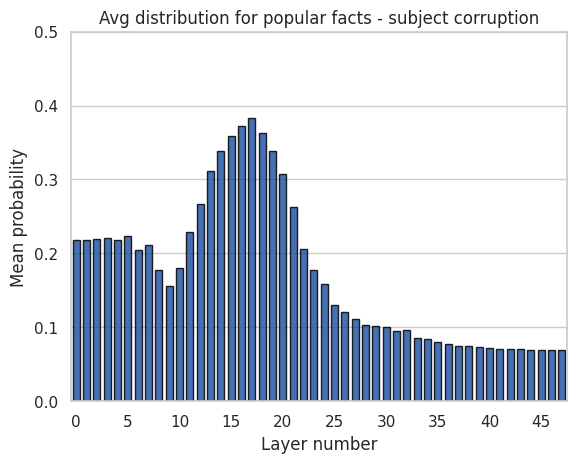

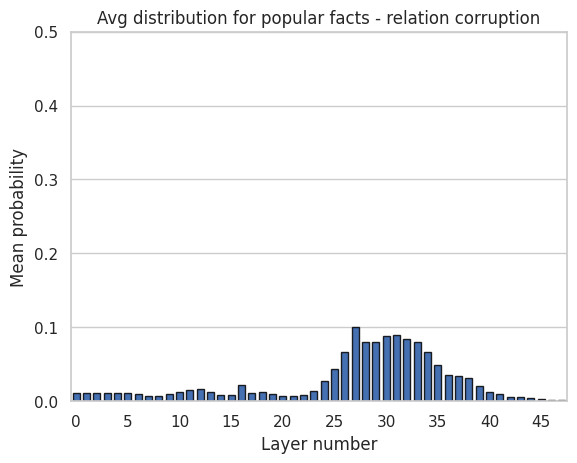

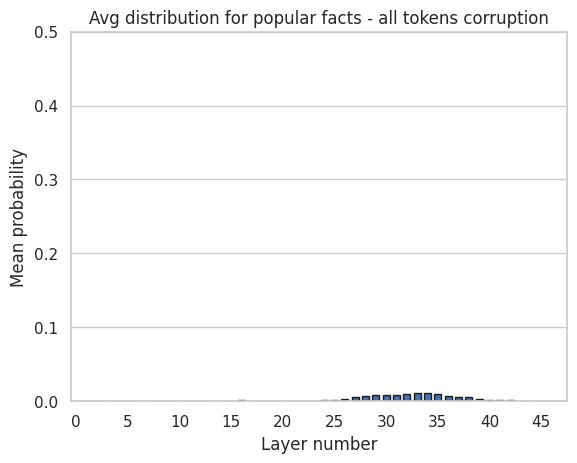

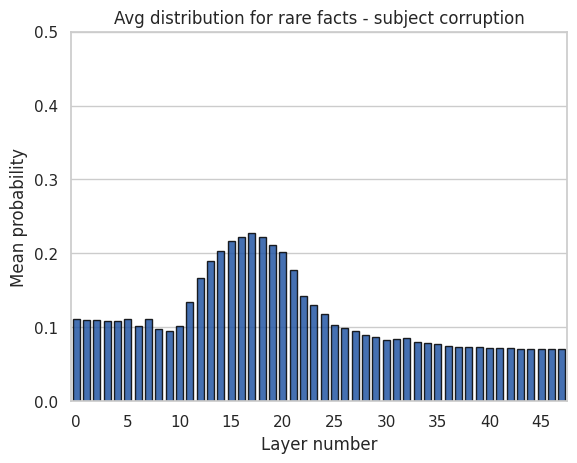

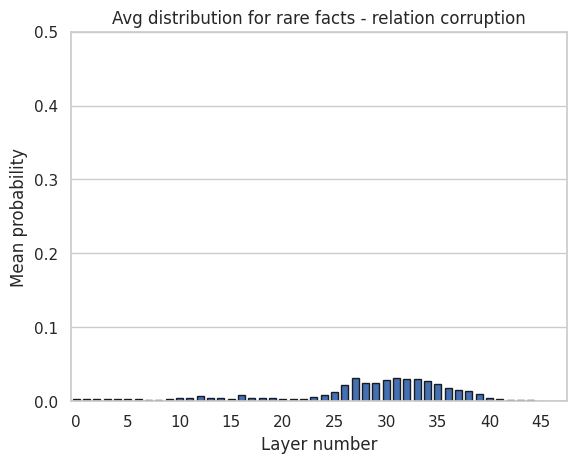

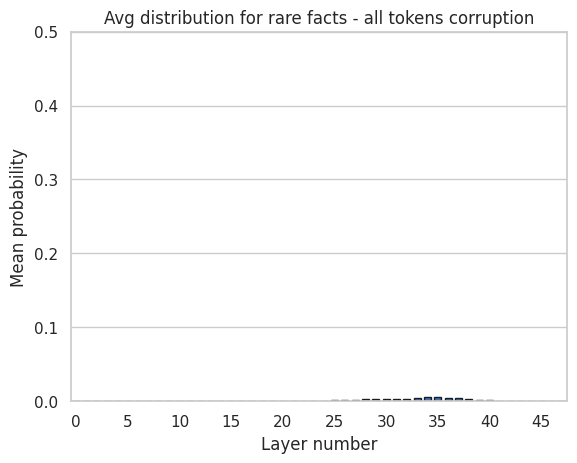

In [ ]:
avg_plot(popular_df_subject,'Avg distribution for popular facts - subject corruption')
avg_plot(popular_df_relation,'Avg distribution for popular facts - relation corruption')
avg_plot(popular_df_all,'Avg distribution for popular facts - all tokens corruption')
avg_plot(rare_df_subject,'Avg distribution for rare facts - subject corruption')
avg_plot(rare_df_relation,'Avg distribution for rare facts - relation corruption')
avg_plot(rare_df_all,'Avg distribution for rare facts - all tokens corruption')

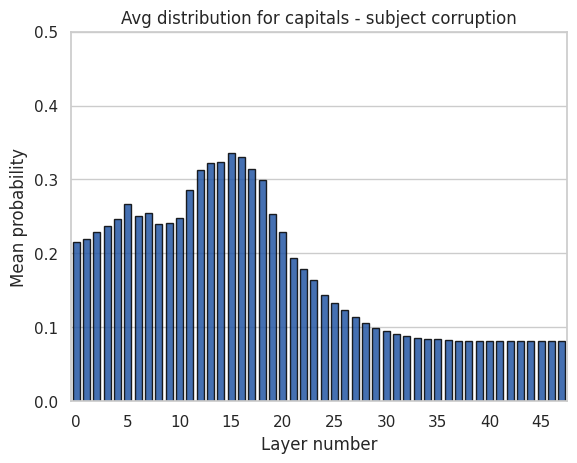

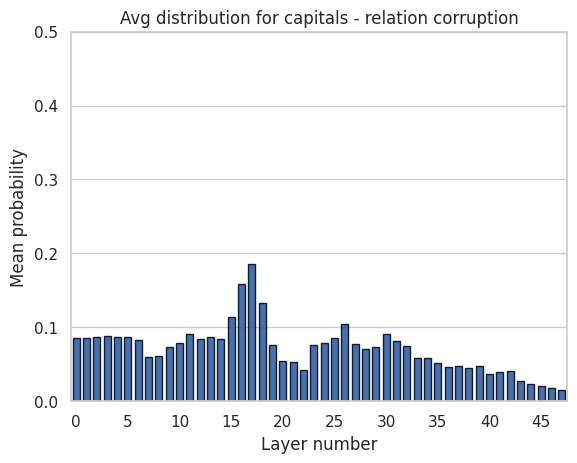

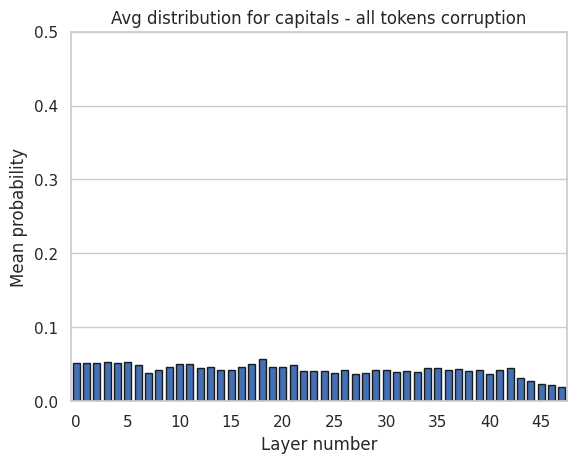

In [ ]:
avg_plot(df1,'Avg distribution for capitals - subject corruption')
avg_plot(df2,'Avg distribution for capitals - relation corruption')
avg_plot(df3,'Avg distribution for capitals - all tokens corruption')

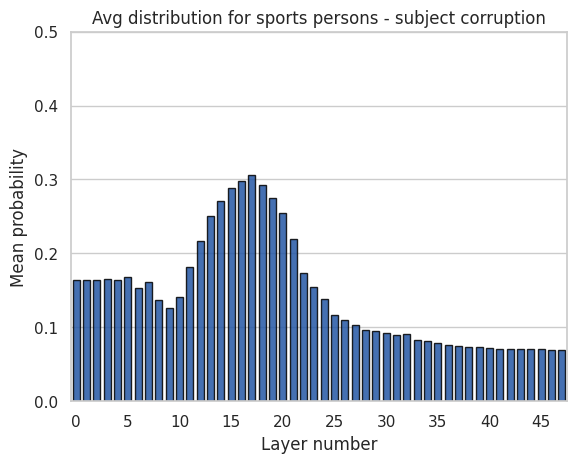

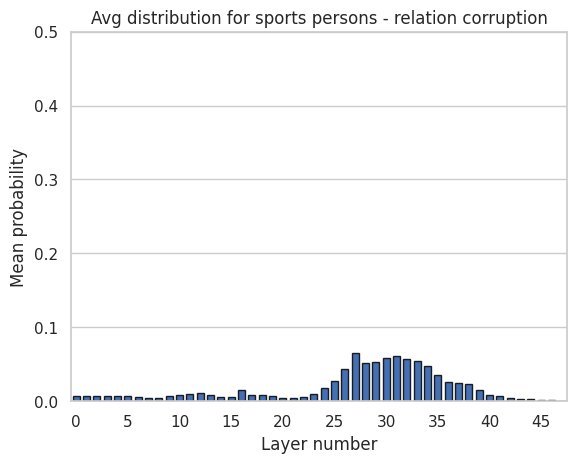

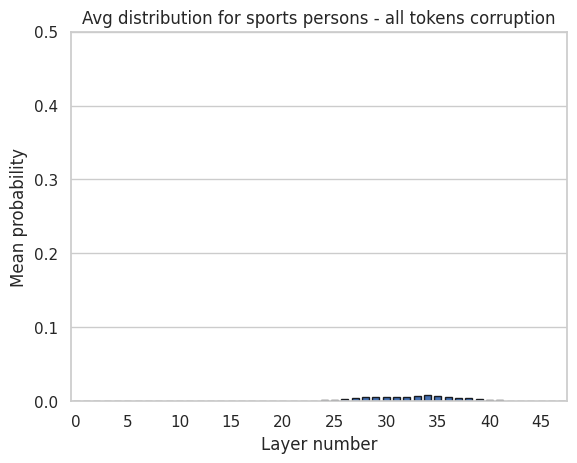

In [ ]:
avg_plot(df7,'Avg distribution for sports persons - subject corruption')
avg_plot(df8,'Avg distribution for sports persons - relation corruption')
avg_plot(df9,'Avg distribution for sports persons - all tokens corruption')

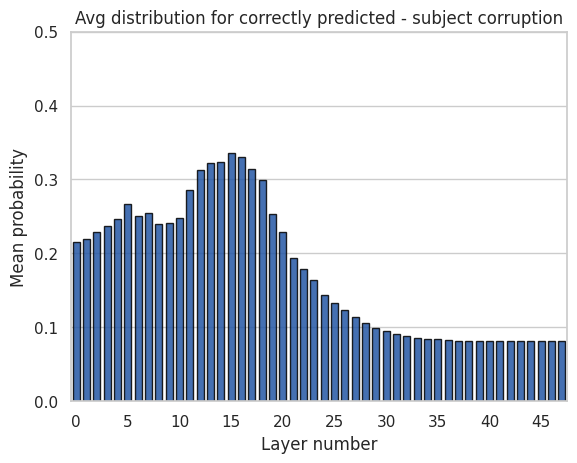

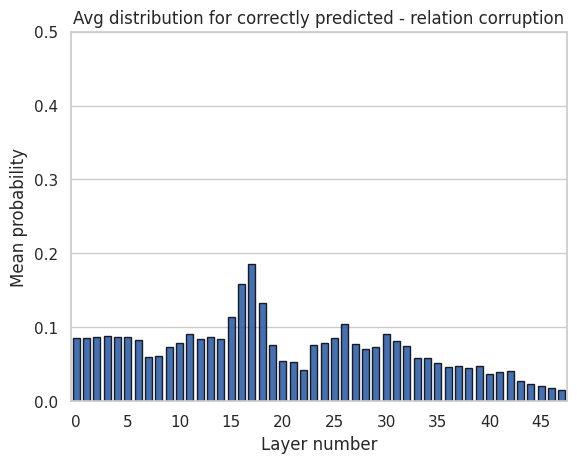

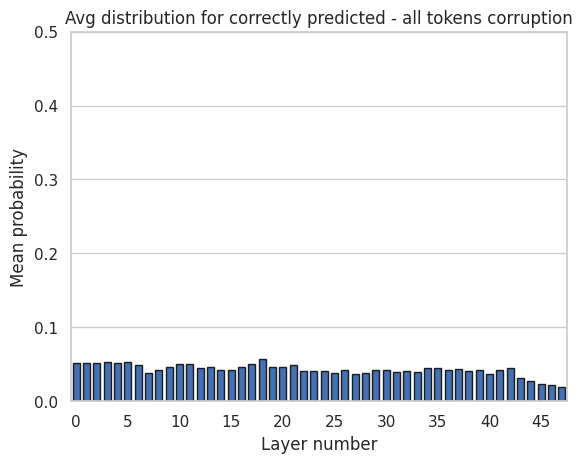

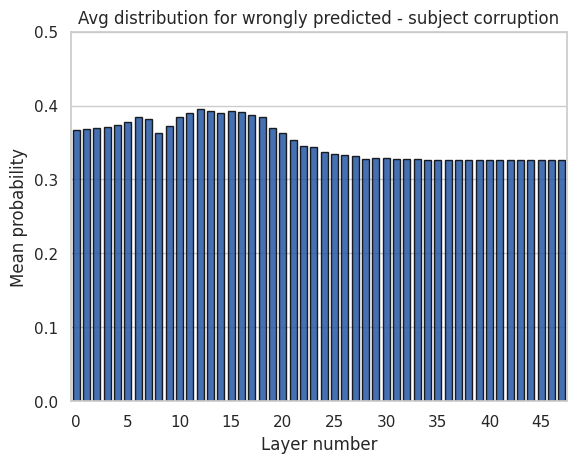

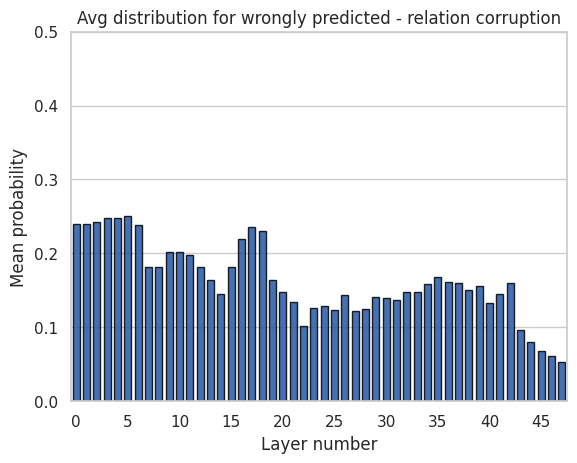

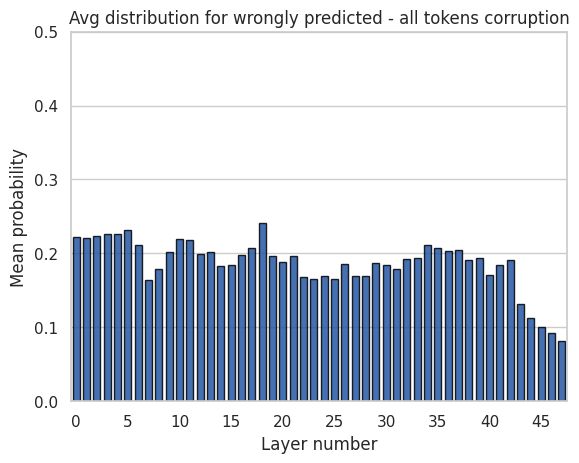

In [ ]:
avg_plot(df1,'Avg distribution for correctly predicted - subject corruption')
avg_plot(df2,'Avg distribution for correctly predicted - relation corruption')
avg_plot(df3,'Avg distribution for correctly predicted - all tokens corruption')
avg_plot(df4,'Avg distribution for wrongly predicted - subject corruption')
avg_plot(df5,'Avg distribution for wrongly predicted - relation corruption')
avg_plot(df6,'Avg distribution for wrongly predicted - all tokens corruption')

In [ ]:
def iqr(row):
    row = row/np.sum(row)
    running_sum = 0
    first = 0
    for i in range(48):
        running_sum+= row[i]
        if running_sum>0.25 and first == 0:
            q25 = i
            first = 1
        if  running_sum>0.75:
            q75 = i
            break

    iqr = q75 - q25
    return iqr


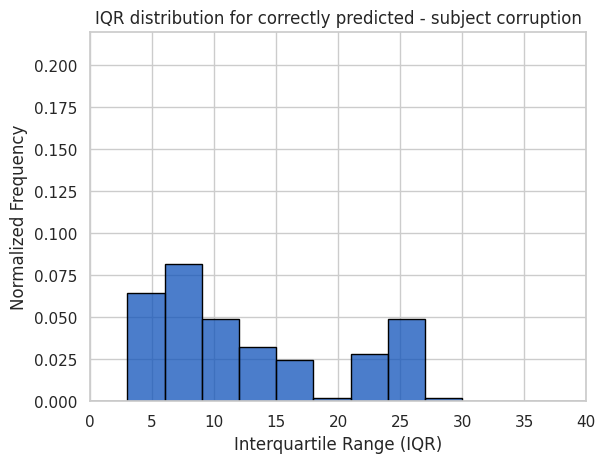

Mean IQR: 12.238636363636363


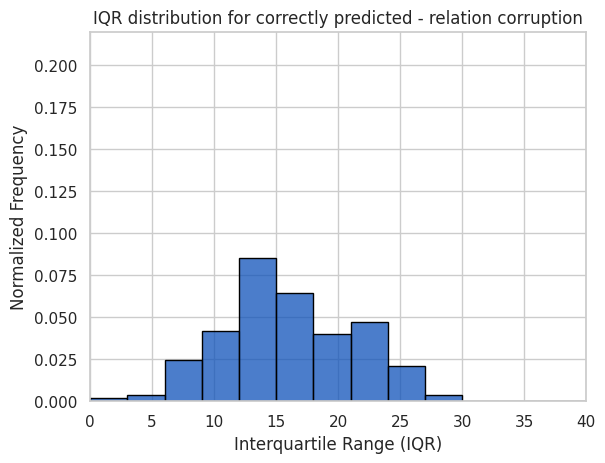

Mean IQR: 15.488636363636363


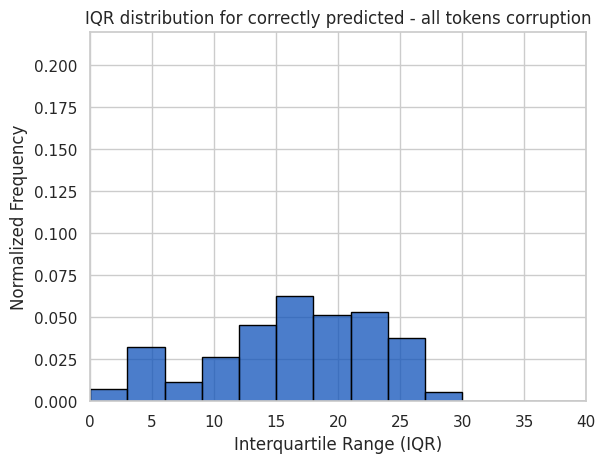

Mean IQR: 16.119318181818183


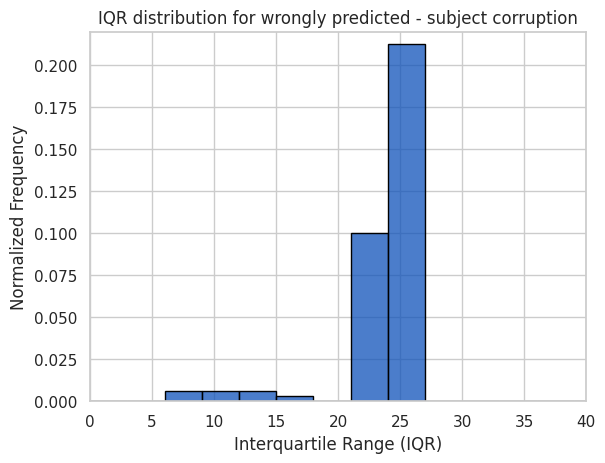

Mean IQR: 23.008849557522122


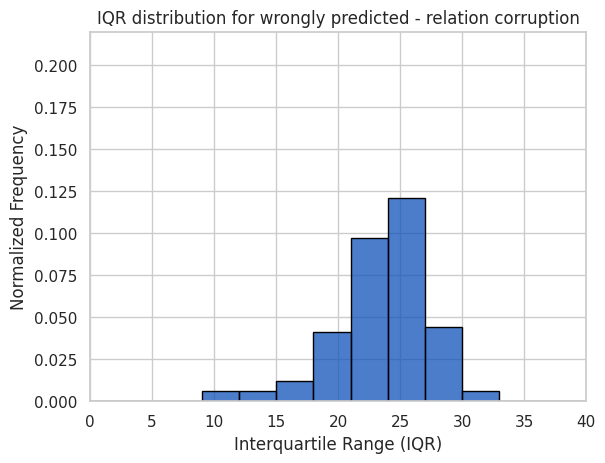

Mean IQR: 23.079646017699115


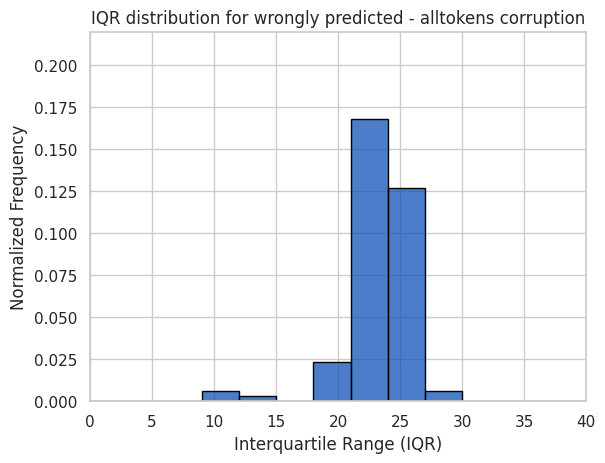

Mean IQR: 22.76991150442478


In [ ]:
def plot_iqr(df, title):

    iqrs = df.apply(lambda row: iqr(row), axis=1)

    sns.histplot(iqrs, bins=np.arange(0,48,3), kde=False, stat="density", alpha=0.75, edgecolor='black', color = '#0f52ba')
    
    # Set labels and title
    plt.xlabel('Interquartile Range (IQR)')
    plt.ylabel('Normalized Frequency')
    plt.title(title)
    plt.xlim(0, 40)
    plt.ylim(0,0.22)

    # Show the plot
    plt.show()
    print(f'Mean IQR: {np.mean(iqrs)}')
plot_iqr(df1, 'IQR distribution for correctly predicted - subject corruption')
plot_iqr(df2, 'IQR distribution for correctly predicted - relation corruption')
plot_iqr(df3, 'IQR distribution for correctly predicted - all tokens corruption')
plot_iqr(df4, 'IQR distribution for wrongly predicted - subject corruption')
plot_iqr(df5, 'IQR distribution for wrongly predicted - relation corruption')
plot_iqr(df6, 'IQR distribution for wrongly predicted - alltokens corruption')


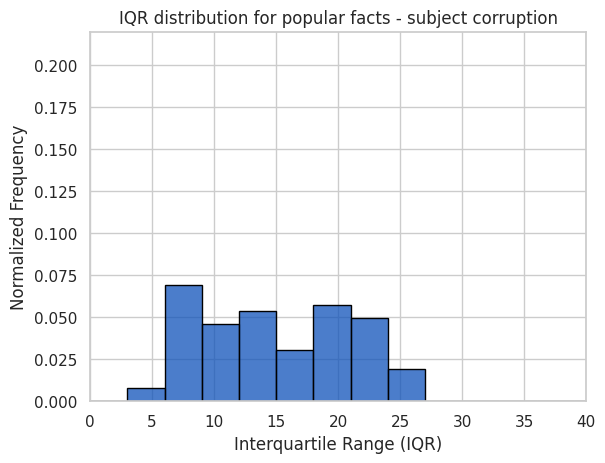

Mean IQR: 14.494252873563218


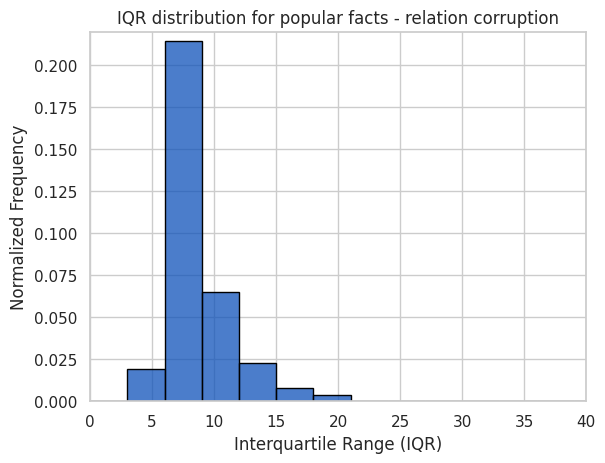

Mean IQR: 8.0


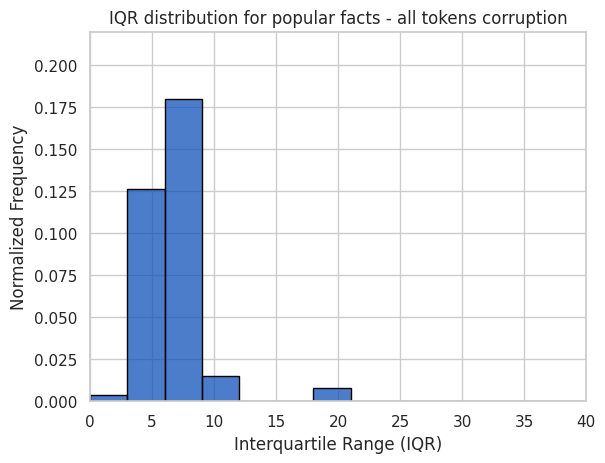

Mean IQR: 6.264367816091954


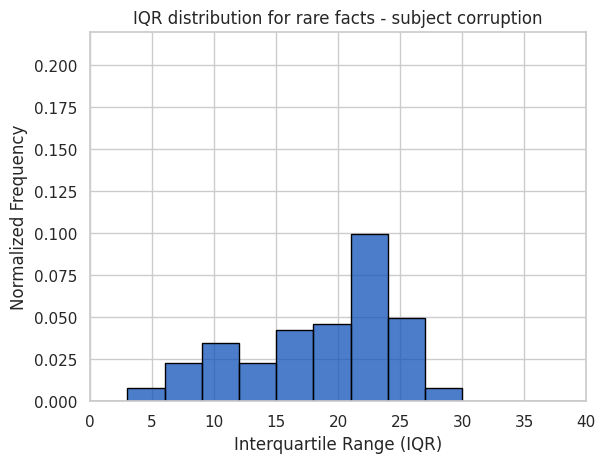

Mean IQR: 18.06896551724138


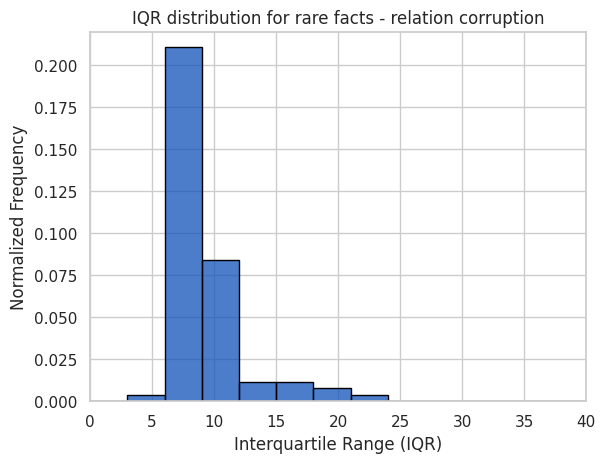

Mean IQR: 8.701149425287356


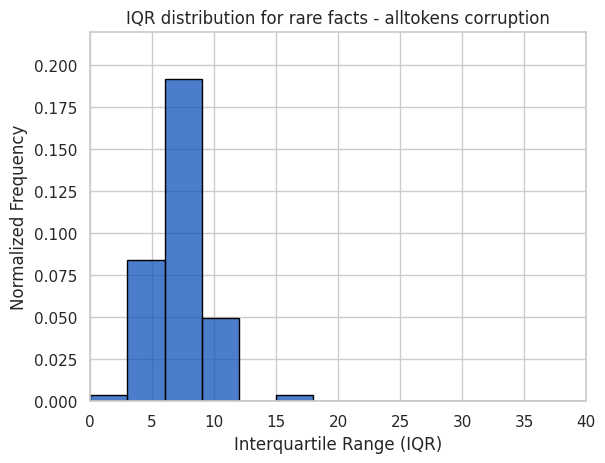

Mean IQR: 6.689655172413793


In [ ]:
plot_iqr(popular_df_subject, 'IQR distribution for popular facts - subject corruption')
plot_iqr(popular_df_relation, 'IQR distribution for popular facts - relation corruption')
plot_iqr(popular_df_all, 'IQR distribution for popular facts - all tokens corruption')
plot_iqr(rare_df_subject, 'IQR distribution for rare facts - subject corruption')
plot_iqr(rare_df_relation, 'IQR distribution for rare facts - relation corruption')
plot_iqr(rare_df_all, 'IQR distribution for rare facts - alltokens corruption')

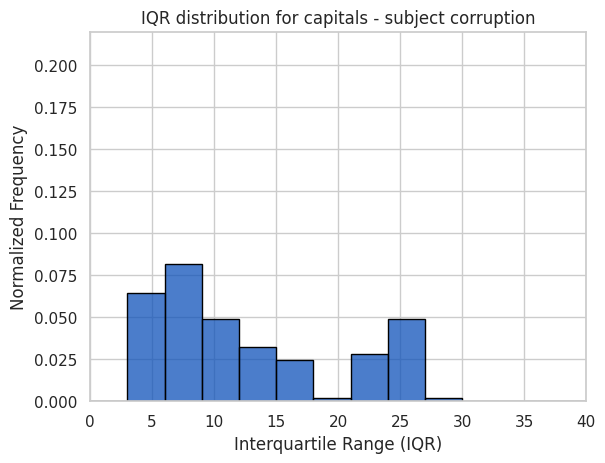

Mean IQR: 12.238636363636363


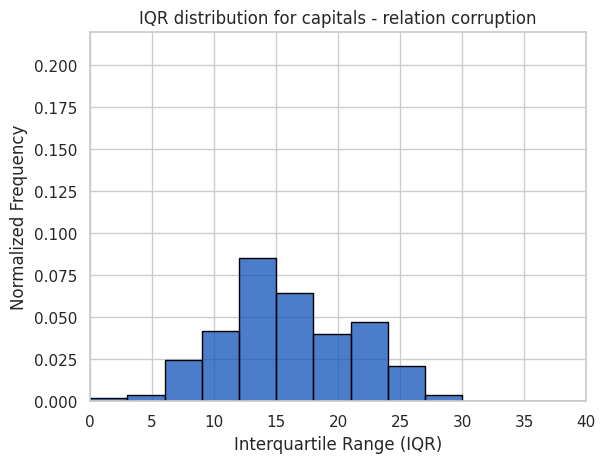

Mean IQR: 15.488636363636363


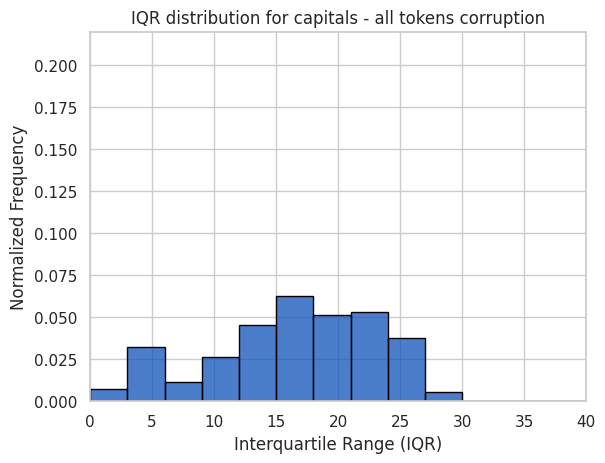

Mean IQR: 16.119318181818183


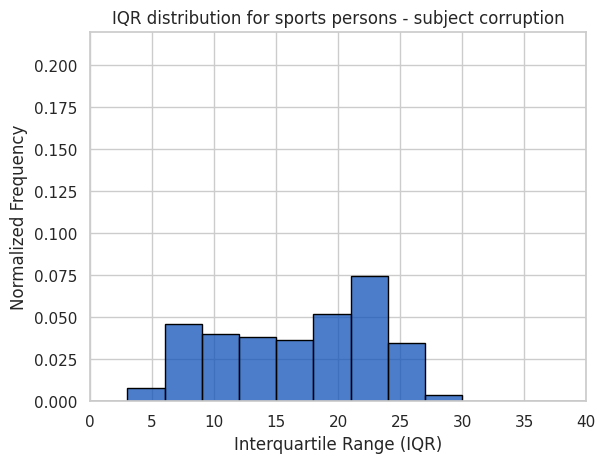

Mean IQR: 16.2816091954023


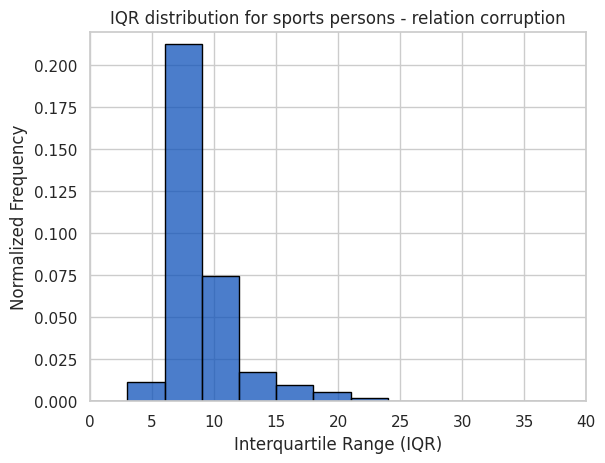

Mean IQR: 8.350574712643677


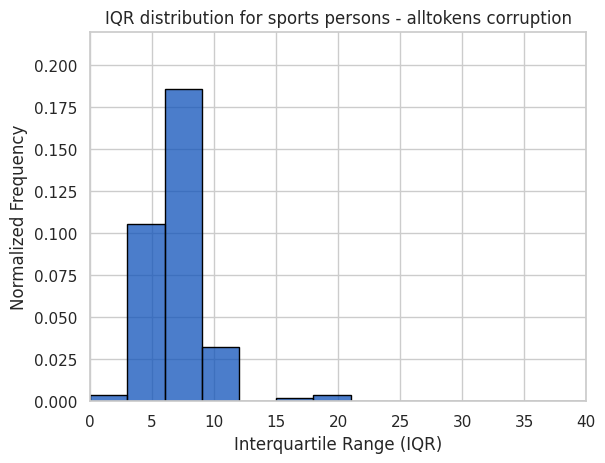

Mean IQR: 6.477011494252873


In [ ]:
plot_iqr(df1, 'IQR distribution for capitals - subject corruption')
plot_iqr(df2, 'IQR distribution for capitals - relation corruption')
plot_iqr(df3, 'IQR distribution for capitals - all tokens corruption')
plot_iqr(df7, 'IQR distribution for sports persons - subject corruption')
plot_iqr(df8, 'IQR distribution for sports persons - relation corruption')
plot_iqr(df9, 'IQR distribution for sports persons - alltokens corruption')

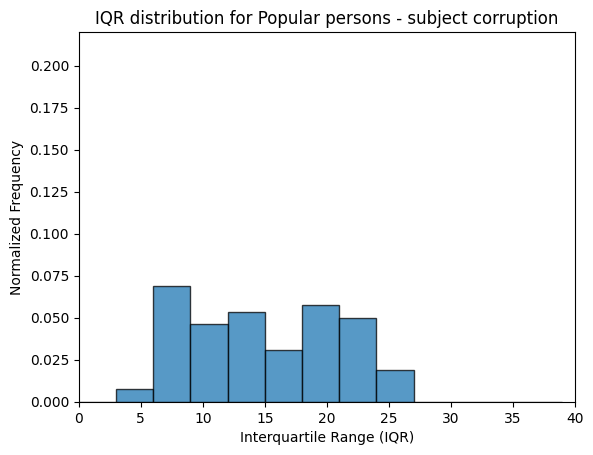

Mean IQR: 14.494252873563218


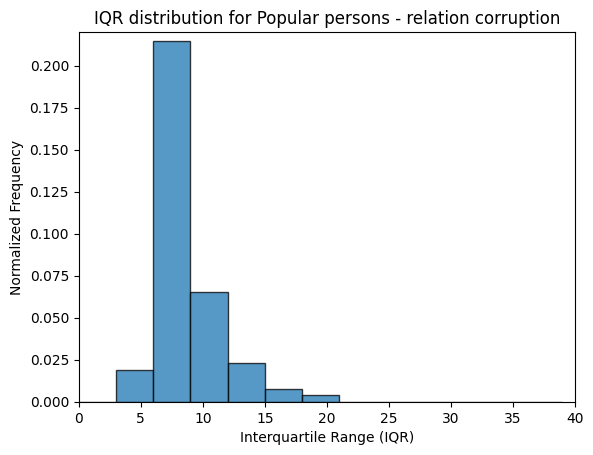

Mean IQR: 8.0


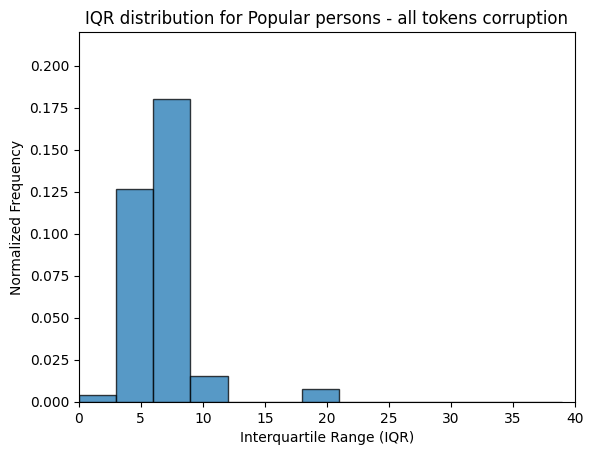

Mean IQR: 6.264367816091954


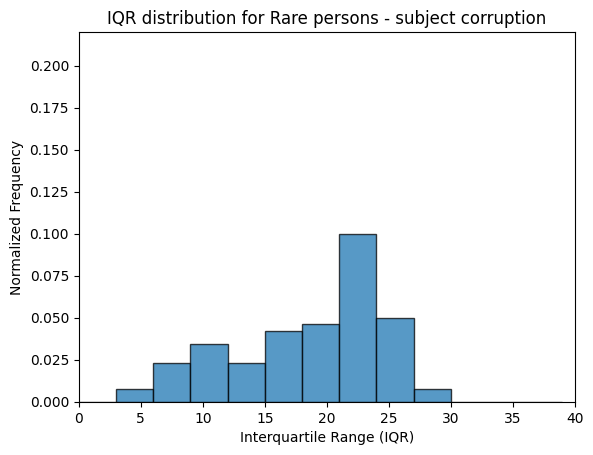

Mean IQR: 18.06896551724138


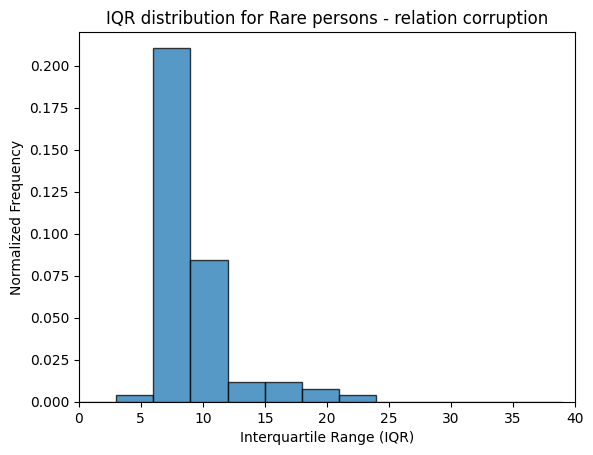

Mean IQR: 8.701149425287356


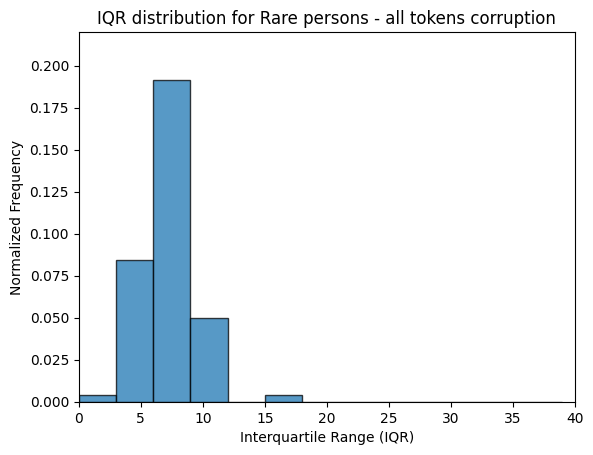

Mean IQR: 6.689655172413793


In [ ]:
plot_iqr(df4[:87], 'IQR distribution for Popular persons - subject corruption')
plot_iqr(df5[:87], 'IQR distribution for Popular persons - relation corruption')
plot_iqr(df6[:87], 'IQR distribution for Popular persons - all tokens corruption')
plot_iqr(df4[87:], 'IQR distribution for Rare persons - subject corruption')
plot_iqr(df5[87:], 'IQR distribution for Rare persons - relation corruption')
plot_iqr(df6[87:], 'IQR distribution for Rare persons - all tokens corruption')